In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Consider "Rosenbrock" function:

$f(x,y) = (1-x_1)^2 + 100(x_2-x_1^2)^2$

With a starting point [0,0]^T, apply two iterations of Newton's meethod to minimize Rosenbrock function. Hint:

$\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}^{-1} = \frac{1}{ad-bc}
\begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix}$

First we recall the Newton's method:

$x_{n+1} = x_n - F(x_n)^{-1}g_n$, where $F(x_n)$ is the Hessian matrix of $f(x,y)$, and $g_n$ is the gradient vector of $f(x,y)$.

To do each iteration, we need to compute the Hessian matrix and the gradient vector. Then we use these two to compute the next point in each iteration using the formula:

$x_{n+1} = x_n - \begin{pmatrix}
2(1-x_1) & -400x_1 \\
-400x_1 & 200
\end{pmatrix}^{-1}
\begin{pmatrix}
-2(1-x_1) \\
-200(x_2-x_1^2)
\end{pmatrix}$ evaluated at the point $x_n$.




The first iteration is:

$x_1 = \begin{pmatrix}
0 \\
0
\end{pmatrix} - \begin{pmatrix}
2 & 0 \\
0 & 200
\end{pmatrix}^{-1}
\begin{pmatrix}
-2 \\
-0
\end{pmatrix} = \begin{pmatrix}
1 \\
0
\end{pmatrix}$

The second iteration is:

$x_2 = \begin{pmatrix}
1 \\
0
\end{pmatrix} - \begin{pmatrix}
0 & -400 \\
-400 & 200
\end{pmatrix}^{-1}
\begin{pmatrix}
0 \\
200
\end{pmatrix} = \begin{pmatrix}
3/2 \\
0
\end{pmatrix}$

# Problem 2

Let $S=$ span ${x_1, x_2, x_3}$, where

$x_1 = \begin{pmatrix}1\\1\\0\\0\end{pmatrix}$,
$x_2 = \begin{pmatrix}2\\2\\0\\-3\end{pmatrix}$,
$x_3 = \begin{pmatrix}0\\-1\\1\\0\end{pmatrix}$

Find an orthonomal basis for $S$, using Gram-Schmidt process.

The Gram Schmidt process is a method for finding an orthonormal basis for a subspace of a vector space. The process is as follows:

1. Start with a set of vectors $\{v_1, v_2, \dots, v_n\}$ in a vector space $V$.

2. Let $u_1 = v_1$.

3. For $i = 2, 3, \dots, n$:

    a. Let $u_i = v_i - \sum_{j=1}^{i-1} \frac{u_j \cdot v_i}{u_j \cdot u_j} u_j$.

    b. Normalize $u_i$ by dividing by its length.

4. The vectors $\{u_1, u_2, \dots, u_n\}$ are an orthonormal basis for the subspace spanned by $\{v_1, v_2, \dots, v_n\}$.

We start with the vector $x_1$.

$u_1 = x_1 = \begin{pmatrix}1\\1\\0\\0\end{pmatrix}$

Next, we subtract the projection of $x_2$ onto $u_1$ from $x_2$.

$u_2 = x_2 - \frac{u_1 \cdot x_2}{u_1 \cdot u_1} u_1 = \begin{pmatrix}2\\2\\0\\-3\end{pmatrix} - \frac{1}{2} \begin{pmatrix}1\\1\\0\\0\end{pmatrix} = \begin{pmatrix}1\\1\\0\\-3\end{pmatrix}$

Next, we subtract the projection of $x_3$ onto $u_1$ and $u_2$ from $x_3$.

$u_3 = x_3 - \frac{u_1 \cdot x_3}{u_1 \cdot u_1} u_1 - \frac{u_2 \cdot x_3}{u_2 \cdot u_2} u_2 = \begin{pmatrix}0\\-1\\1\\0\end{pmatrix} - \frac{1}{2} \begin{pmatrix}1\\1\\0\\0\end{pmatrix} - \frac{1}{2} \begin{pmatrix}1\\1\\0\\-3\end{pmatrix} = \begin{pmatrix}0\\-1\\1\\3\end{pmatrix}$

Finally, we normalize each vector.

$u_1 = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\1\\0\\0\end{pmatrix}$
$u_2 = \frac{1}{\sqrt{6}} \begin{pmatrix}1\\1\\0\\-3\end{pmatrix}$
$u_3 = \frac{1}{\sqrt{10}} \begin{pmatrix}0\\-1\\1\\3\end{pmatrix}$

The vectors $\{u_1, u_2, u_3\}$ are an orthonormal basis for the subspace spanned by $\{x_1, x_2, x_3\}$.

# Problem 3

Write a code and implement the Gauss-Newton Method on the last example given in the lecture, to find $A$, $\omega$, and $\phi$ such that the resulting sinusoid $y=A\sin(\omega t+\phi)$ best $(t, y_i), i=1,2,\cdots, 21$, with $t_1 = 0$ and $t_21 = 10$ and $y_i$ given roughly below.

We recall from the lectures that the Gauss-Newton method is given by:

$x_{n+1} = x_n - (J^TJ)^{-1}J^Tr(x_n)$

where $J$ is the Jacobian matrix of $f(x)$, and $f(x)$ is the vector of residuals.

We note that $J^Tr(x_n)$ is the gradient of $f(x)$, and $J^TJ$ is the Hessian of $f(x)$.

As mentioned in the lecture, the problem is described as 

minimize $\sum_{i=1}^{21} (y_i - A\sin(\omega t_i + \phi))^2$.

The first step is to transcribe the approximate data from the plot. We will use this data to calculate the residuals in each iteration of the Gauss-newton method. 

In [54]:
t = np.linspace(0, 10, 21)
y = np.array([1.2,1.9, 2, 1.3, 0.1, -0.5, -1.5, -2.0, -2.2, -1.5, -0.4, 0.3, 0.9, 1.4, 1.8, 2.1, 1.6, 0.8, -0.3, -1.0, -1.5])

Now we calculate the Jacobian matrix $J$. 

$J = \begin{pmatrix}
\frac{\partial f_1}{\partial A} & \frac{\partial f_1}{\partial \omega} & \frac{\partial f_1}{\partial \phi} \\
\frac{\partial f_2}{\partial A} & \frac{\partial f_2}{\partial \omega} & \frac{\partial f_2}{\partial \phi} \\
\vdots & \vdots & \vdots \\
\frac{\partial f_{21}}{\partial A} & \frac{\partial f_{21}}{\partial \omega} & \frac{\partial f_{21}}{\partial \phi}
\end{pmatrix}$




The jacobian matrix for our sinusoid is given by:

$J = \begin{pmatrix}
\sin(\omega t_1 + \phi) & A\cos(\omega t_1 + \phi)t_1 & A\cos(\omega t_1 + \phi) \\
\sin(\omega t_2 + \phi) & A\cos(\omega t_2 + \phi)t_2 & A\cos(\omega t_2 + \phi) \\
\vdots & \vdots & \vdots \\
\sin(\omega t_{21} + \phi) & A\cos(\omega t_{21} + \phi)t_{21} & A\cos(\omega t_{21} + \phi)
\end{pmatrix}$


We now implement the Gauss-Newton method. We start with an initial guess of $A = 2$, $\omega = 1$, and $\phi = 0$. We then calculate the Jacobian matrix and the residual vector using these values and the data.


In [88]:
# function to compute the jacobian given A, omega, and phi, and the length of the data
def jacobian(t,A, omega, phi, length):
    j = np.zeros((length, 3))
    j[:,0] = np.sin(omega*t + phi)
    j[:,1] = A*t*np.cos(omega*t + phi)
    j[:,2] = A*np.cos(omega*t + phi)
    return j

# function to compute the residuals given y, A, omega, and phi, and the length of the data
def residuals(t,y,A, omega, phi, length):
    r = np.zeros(length)
    r = y - A*np.sin(omega*t + phi)
    return r    

# funtion to conduct the Gauss-Newton algorithm
def gauss_newton(t,y, A, omega, phi, length, iterations):
    for i in range(iterations):
        # compute the jacobian and residuals
        j = jacobian(t,A, omega, phi, length)
        r = residuals(t,y, A, omega, phi, length)
        # compute the update
        delta = np.dot(np.linalg.inv(np.dot(np.transpose(j), j)), np.dot(np.transpose(j), r))
        # update the parameters
        A = A + delta[0]
        omega = omega + delta[1]
        phi = phi + delta[2]
        #print("Iteration: ", i, " A: ", A, " omega: ", omega, " phi: ", phi)
    print("A: ", A, "omega: ", omega, "phi: ", phi)
    return A, omega, phi


In [89]:
results = gauss_newton(t=t,y=y,A=1, omega=1, phi=1, length=21, iterations=1000)

A:  1.938332887309353 omega:  0.9376243719487016 phi:  1.112005415145034


In [90]:
# plot the sinusoid curve given the fitted parameters
def plot_curve(t,y,A, omega, phi):
    plt.plot(t, A*np.sin(omega*t + phi))
    plt.plot(t, y, 'ro')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.show()

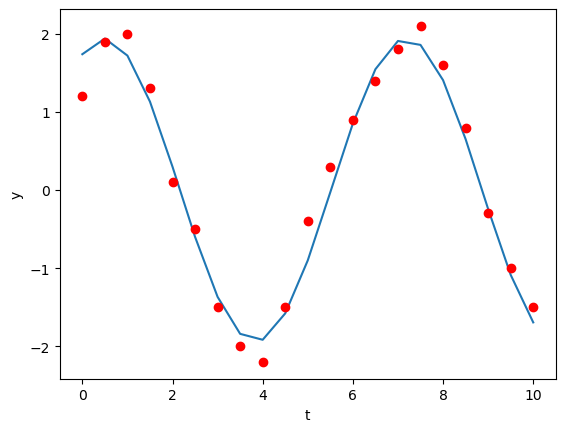

In [91]:
plot_curve(t=t,y=y,A=results[0], omega=results[1], phi=results[2])